In [ ]:
  import requests
from bs4 import BeautifulSoup
import pandas as pd


#url 잘게 자르기
url = "http://openapi.work.go.kr/opi/opi/opia/wantedApi.do"
#url ="http://openapi.work.go.kr/opi/opi/opia/wantedApi.do?authKey=WNKXZRZNR5AUCD0GJSCZJ2VR1HK&callTp=L&returnType=XML&startPage=1&display=100&occupation=023|024|025&&region=11000|41130"
serviceKey = "?authKey=WNKXZRZNR5AUCD0GJSCZJ2VR1HK"
Calltp = "&callTp=L"
Return = "&returnType=XML"
StartPage="&startPage=6"
Display = "&display=100"
OCCUPATION = "&occupation=023|024|025"
Region = "&region=11000|41130"

#항목 parsing 함수작성하기
def parse():
    try:
        COMPANY = wanted.find("company").get_text()
        TITLE = wanted.find("title").get_text()
        SAL_TMNM = wanted.find("salTpNm").get_text()
        SAL = wanted.find("sal").get_text()
        REGION = wanted.find("region").get_text()
        HOLIDAY_TPNM = wanted.find("holidayTpNm").get_text()
        MIN_DEUBG = wanted.find("minEdubg").get_text()
        CAREER = wanted.find("career").get_text()
        return {
            "회사명":COMPANY,
            "체용제목":TITLE,
            "임금형태":SAL_TMNM,
            "급여":SAL,
            "근무지역":REGION,
            "근무형태":HOLIDAY_TPNM,
            "최소학력":MIN_DEUBG,
            "경력":CAREER,
        }
    except AttributeError as e:
        return {
            "회사명":None,
            "체용제목":None,
            "임금형태":None,
            "급여":None,
            "근무지역":None,
            "근무형태":None,
            "최소학력":None,
            "경력":None,
        }
 
#parsing 하기
result = requests.get(url+serviceKey+Calltp+Return+StartPage+Display+OCCUPATION+Region)
soup = BeautifulSoup(result.text,'lxml-xml')
wanteds = soup.find_all("wanted")
 
row = []
for wanted in wanteds:
    row.append(parse()) 
 
#pandas 데이터프레임에 넣기
df = pd.DataFrame(row)

df.to_csv("서울_성남_개발자_채용정보_6.csv",mode='w',encoding='utf-8')


In [ ]:
df

,회사명,체용제목,임금형태,급여,근무지역,근무형태,최소학력,경력
0,(주)더테스트,스마트 TV 소프트웨어 테스트 엔지니어 채용(평택...,연봉,2400만원 ~ 2450만원,서울 서초구,주5일근무,대졸(2~3년),관계없음
1,컴정보,컴퓨터 수리,연봉,3000만원 ~ 3000만원,서울 용산구,주5일근무,학력무관,신입
2,(주)엔클라우드,(주)엔클라우드 기업부설연구소 정규직 신입 Web...,연봉,2900만원 ~ 2900만원,서울 강서구,주5일근무,대졸(4년),신입
3,(주)유온아이티,(주)유온아이티 - &lt;[IT기술지원가&gt;...,연봉,2800만원 ~ 2800만원,서울 금천구,주5일근무,학력무관,관계없음
4,(주)와이키키소프트,웹기반 소프트웨어개발자 모집,연봉,2500만원 ~ 2900만원,서울 강남구,주5일근무,학력무관,관계없음
5,션마케팅,윈도우 응용프로그램 개발 구인공고,월급,250만원 ~ 500만원,서울 송파구,주5일근무,학력무관,관계없음
6,엔에스원소프트,(신입/경력) 언리얼 기반 3D 시뮬레이션 교육 ...,연봉,2300만원 ~ 3500만원,서울 서초구,주5일근무,학력무관,관계없음
7,(주)에이치비티,응용프로그래머/머신비전/3D영상처리,연봉,3000만원 ~ 7000만원,경기 성남시 중원구,주5일근무,학력무관,관계없음
8,(주)인포웨어,"보안컨설팅 부문(신입,경력) 모집",월급,200만원,서울 금천구,주5일근무,대졸(4년),관계없음
9,더시픽 주식회사,정규직 개발자 채용,월급,300만원 ~ 450만원,서울 성동구,주5일근무,학력무관,신입


In [ ]:
import os

path = "./"
file_list = os.listdir(path)
file_list_csv = [file for file in file_list if file.endswith(".csv")]

print ("file_list_csv: {}".format(file_list_csv))

file_list_csv: ['서울_성남_개발자_채용정보_1.csv', '서울_성남_개발자_채용정보_5.csv', '서울_성남_개발자_채용정보_4.csv', '서울_성남_개발자_채용정보_6.csv', '서울_성남_개발자_채용정보_2.csv', '서울_성남_개발자_채용정보_3.csv']


In [ ]:
df_soul_sungnam_SW_2022_01_14 = pd.DataFrame()
for i in range(0,len(file_list_csv)):
    if file_list_csv[i].split('.')[1] == 'csv':
        file = file_list_csv[i]
        df= pd.read_csv(file,encoding='utf-8') 
        df_soul_sungnam_SW_2022_01_14 = pd.concat([df_soul_sungnam_SW_2022_01_14, df])

In [ ]:
del df_soul_sungnam_SW_2022_01_07['Unnamed: 0']
df_soul_sungnam_SW_2022_01_07.reset_index(drop=True, inplace=True)

In [ ]:
df_soul_sungnam_SW_2022_01_14

,Unnamed: 0,회사명,체용제목,임금형태,급여,근무지역,근무형태,최소학력,경력
0,0,(주)그레이스케일,"[쇼핑몰 기획자, 웹 디자이너] 즐겁게 오래 근무...",연봉,2500만원 ~ 4500만원,서울 서초구,주5일근무,대졸(2~3년),경력
1,1,더나은인재들,[더나은인재교육컨설팅] 에듀테크 인공지능(AI) ...,연봉,3000만원 ~ 4000만원,서울 강남구,주5일근무,대졸(4년),경력
2,2,(주)우리종합계측기,쇼핑몰MD 정규직직원 채용,연봉,2500만원 ~ 2500만원,서울 금천구,주5일근무,학력무관,경력
3,3,주식회사 와이드큐브,JAVA 프로그래밍 개발자 정규직 모집,월급,250만원 ~ 550만원,서울 금천구,주5일근무,대졸(2~3년),경력
4,4,(주)웰오프,(주)웰오프 스토리지시스템 기술엔지니어 모집공고,연봉,3000만원,서울 영등포구,주5일근무,대졸(2~3년),관계없음
...,...,...,...,...,...,...,...,...,...
95,95,에코파워팩,친환경 에너지 기업 에코파워팩에서 기구설계 연구원...,연봉,2800만원,서울 영등포구,주5일근무,학력무관,경력
96,96,아멕스지랩 주식회사,웹 프론트&백앤드 개발자를 모집합니다.,연봉,3600만원,서울 금천구,주5일근무,학력무관,관계없음
97,97,(주)차가운,[주식회사 차가운] 웹 및 앱 개발자 모집 (프론...,월급,200만원 ~ 300만원,서울 영등포구,주5일근무,학력무관,관계없음
98,98,인성인터네쇼날(주),"임베디드 S/W, H/W 연구원모집(신입 및 경력...",연봉,3000만원 ~ 4800만원,서울 금천구,주5일근무,학력무관,관계없음


In [ ]:
df_soul_sungnam_SW_2022_01_14.to_csv("서울_성남_SW_채용정보.csv",mode='w',encoding='utf-8')

In [ ]:
df_soul_sungnam_SW_2022_01_14

,Unnamed: 0,회사명,체용제목,임금형태,급여,근무지역,근무형태,최소학력,경력
0,0,(주)그레이스케일,"[쇼핑몰 기획자, 웹 디자이너] 즐겁게 오래 근무...",연봉,2500만원 ~ 4500만원,서울 서초구,주5일근무,대졸(2~3년),경력
1,1,더나은인재들,[더나은인재교육컨설팅] 에듀테크 인공지능(AI) ...,연봉,3000만원 ~ 4000만원,서울 강남구,주5일근무,대졸(4년),경력
2,2,(주)우리종합계측기,쇼핑몰MD 정규직직원 채용,연봉,2500만원 ~ 2500만원,서울 금천구,주5일근무,학력무관,경력
3,3,주식회사 와이드큐브,JAVA 프로그래밍 개발자 정규직 모집,월급,250만원 ~ 550만원,서울 금천구,주5일근무,대졸(2~3년),경력
4,4,(주)웰오프,(주)웰오프 스토리지시스템 기술엔지니어 모집공고,연봉,3000만원,서울 영등포구,주5일근무,대졸(2~3년),관계없음
...,...,...,...,...,...,...,...,...,...
95,95,에코파워팩,친환경 에너지 기업 에코파워팩에서 기구설계 연구원...,연봉,2800만원,서울 영등포구,주5일근무,학력무관,경력
96,96,아멕스지랩 주식회사,웹 프론트&백앤드 개발자를 모집합니다.,연봉,3600만원,서울 금천구,주5일근무,학력무관,관계없음
97,97,(주)차가운,[주식회사 차가운] 웹 및 앱 개발자 모집 (프론...,월급,200만원 ~ 300만원,서울 영등포구,주5일근무,학력무관,관계없음
98,98,인성인터네쇼날(주),"임베디드 S/W, H/W 연구원모집(신입 및 경력...",연봉,3000만원 ~ 4800만원,서울 금천구,주5일근무,학력무관,관계없음


In [ ]:
df_soul_sungnam_SW_2022_01_14['임금형태'].unique()

array(['연봉', '월급', '시급'], dtype=object)

- 시급삭제

In [ ]:
DEL = df_soul_sungnam_SW_2022_01_14[df_soul_sungnam_SW_2022_01_14['임금형태'] == '시급'].index
df_soul_sungnam_SW_2022_01_14.drop(DEL, inplace=True)

In [ ]:
df_soul_sungnam_SW_2022_01_14

,Unnamed: 0,회사명,체용제목,임금형태,급여,근무지역,근무형태,최소학력,경력
0,0,(주)그레이스케일,"[쇼핑몰 기획자, 웹 디자이너] 즐겁게 오래 근무...",연봉,2500만원 ~ 4500만원,서울 서초구,주5일근무,대졸(2~3년),경력
1,1,더나은인재들,[더나은인재교육컨설팅] 에듀테크 인공지능(AI) ...,연봉,3000만원 ~ 4000만원,서울 강남구,주5일근무,대졸(4년),경력
2,2,(주)우리종합계측기,쇼핑몰MD 정규직직원 채용,연봉,2500만원 ~ 2500만원,서울 금천구,주5일근무,학력무관,경력
3,3,주식회사 와이드큐브,JAVA 프로그래밍 개발자 정규직 모집,월급,250만원 ~ 550만원,서울 금천구,주5일근무,대졸(2~3년),경력
4,4,(주)웰오프,(주)웰오프 스토리지시스템 기술엔지니어 모집공고,연봉,3000만원,서울 영등포구,주5일근무,대졸(2~3년),관계없음
...,...,...,...,...,...,...,...,...,...
95,95,에코파워팩,친환경 에너지 기업 에코파워팩에서 기구설계 연구원...,연봉,2800만원,서울 영등포구,주5일근무,학력무관,경력
96,96,아멕스지랩 주식회사,웹 프론트&백앤드 개발자를 모집합니다.,연봉,3600만원,서울 금천구,주5일근무,학력무관,관계없음
97,97,(주)차가운,[주식회사 차가운] 웹 및 앱 개발자 모집 (프론...,월급,200만원 ~ 300만원,서울 영등포구,주5일근무,학력무관,관계없음
98,98,인성인터네쇼날(주),"임베디드 S/W, H/W 연구원모집(신입 및 경력...",연봉,3000만원 ~ 4800만원,서울 금천구,주5일근무,학력무관,관계없음


In [ ]:
df_soul_sungnam_SW_2022_01_14['임금형태'].unique()

array(['연봉', '월급'], dtype=object)

In [ ]:
time_split2 = df_soul_sungnam_SW_2022_01_14["급여"].str.split("만")
df_soul_sungnam_SW_2022_01_14["급여"] = time_split2.str.get(0)

In [ ]:
df_month = df_soul_sungnam_SW_2022_01_14[df_soul_sungnam_SW_2022_01_14['임금형태'] == '월급']
df_month

,Unnamed: 0,회사명,체용제목,임금형태,급여,근무지역,근무형태,최소학력,경력
3,3,주식회사 와이드큐브,JAVA 프로그래밍 개발자 정규직 모집,월급,250,서울 금천구,주5일근무,대졸(2~3년),경력
5,5,(주)코리아퍼스텍,인프라사업 구축 경험 TA 모집,월급,500,서울 강서구,주5일근무,학력무관,경력
9,9,더블유피솔루션즈(주),2022년 데이터분석 신입 및 경력직 직원을 모십...,월급,300,서울 구로구,주5일근무,대졸(2~3년),관계없음
10,10,(주)블루마린,IT보안 엔지니어 구직,월급,250,서울 구로구,주5일근무,학력무관,경력
11,11,아트마이닝 주식회사,NFT 플랫폼 제작 기획 경력직 모집 (대리 ~ ...,월급,200,서울 용산구,주5일근무,대졸(4년),경력
...,...,...,...,...,...,...,...,...,...
47,47,DL 네트웍스,[DL 네트웍스] 생활용품 온라인 마켓 웹 상세페...,월급,200,서울 용산구,주5일근무,학력무관,경력
50,50,평생나눔사업협동조합,쇼핑몰 디자인관련 전문인력 모십니다.,월급,250,서울 광진구,주5일근무,학력무관,경력
82,82,인퀘스트(주),소프트웨어 테스트 채용,월급,200,서울 성동구,주5일근무,학력무관,관계없음
89,89,에프디스플레이 주식회사,[반도체/디스플레이/LCD]장비 설계 경력직원 채...,월급,300,서울 금천구,주5일근무,대졸(2~3년),경력


In [ ]:
df_year = df_soul_sungnam_SW_2022_01_14[df_soul_sungnam_SW_2022_01_14['임금형태'] == '연봉']
df_year

,Unnamed: 0,회사명,체용제목,임금형태,급여,근무지역,근무형태,최소학력,경력
0,0,(주)그레이스케일,"[쇼핑몰 기획자, 웹 디자이너] 즐겁게 오래 근무...",연봉,2500,서울 서초구,주5일근무,대졸(2~3년),경력
1,1,더나은인재들,[더나은인재교육컨설팅] 에듀테크 인공지능(AI) ...,연봉,3000,서울 강남구,주5일근무,대졸(4년),경력
2,2,(주)우리종합계측기,쇼핑몰MD 정규직직원 채용,연봉,2500,서울 금천구,주5일근무,학력무관,경력
4,4,(주)웰오프,(주)웰오프 스토리지시스템 기술엔지니어 모집공고,연봉,3000,서울 영등포구,주5일근무,대졸(2~3년),관계없음
6,6,디오엔케이,Cisco 네트워크 및 IPT 엔지니어 모집(신입...,연봉,2700,경기 성남시 분당구,주5일근무,학력무관,관계없음
...,...,...,...,...,...,...,...,...,...
94,94,센시콘,개발직군(JSP/JAVA/안드로이드/아이폰) 모집,연봉,2400,서울 마포구,주5일근무,학력무관,관계없음
95,95,에코파워팩,친환경 에너지 기업 에코파워팩에서 기구설계 연구원...,연봉,2800,서울 영등포구,주5일근무,학력무관,경력
96,96,아멕스지랩 주식회사,웹 프론트&백앤드 개발자를 모집합니다.,연봉,3600,서울 금천구,주5일근무,학력무관,관계없음
98,98,인성인터네쇼날(주),"임베디드 S/W, H/W 연구원모집(신입 및 경력...",연봉,3000,서울 금천구,주5일근무,학력무관,관계없음


In [ ]:
df_soul_sungnam_SW_2022_01_07['급여'].unique()

array(['200', '2500', '3500', '3000', '2400', '2300', '2800', '3300',
       '2600', '6000', '210', '4000', '3600', '3100', '5000', '240',
       '2900', '300', '2640', '3200', '2297', '192', '270', '250', '5100',
       '2700', '3120', '191', '4500', '220', '290', '216', '2460', '260',
       '218', '195', '269', '350', '600', '700', '230', '3400', '416',
       '222', '4100', '3800', '225', '183', '500', '2820', '2350', '3250',
       '2850'], dtype=object)

In [ ]:
df_soul_sungnam_SW_2022_01_07[df_soul_sungnam_SW_2022_01_07['임금형태'] == '월급']

,회사명,체용제목,임금형태,급여,근무지역,근무형태,최소학력,경력
0,(주)오앤,"[신입][경력] 백엔드 JAVA, ASP 개발자 ...",월급,200,서울 강서구,주5일근무,대졸(4년),경력
18,(주)알씨케이,(주)알씨케이에서 개발엔지니어를 채용합니다.,월급,210,서울 강남구,주5일근무,학력무관,관계없음
19,(주)엑스뻬제,회사 홈페이지 c/s 사원 모집,월급,200,서울 강남구,주5일근무,학력무관,관계없음
28,(주)유니오스,"[IT]시스템 엔지니어, 네트워크 엔지니어 구인",월급,200,서울 금천구,주5일근무,학력무관,관계없음
41,주식회사 데이터블록스,자바 & 데이터 전문가 모집,월급,200,서울 종로구,주5일근무,학력무관,관계없음
...,...,...,...,...,...,...,...,...
460,메이트소프트,함께할 웹 개발자를 찾습니다,월급,250,경기 성남시 분당구,NaN,학력무관,경력
461,포에버 I C T,IT솔루션 기술지원 신입 엔지니어 모집,월급,200,서울 구로구,주5일근무,대졸(2~3년),신입
465,사단법인한국장애인단체총연합회 한국웹접근성인증평가원,정보접근성(웹접근성) 인증심사원 모집,월급,220,서울 영등포구,주5일근무,고졸,경력
472,투더웰 주식회사,신입 개발자 채용 안내-투더웰(주),월급,200,서울 강남구,주5일근무,학력무관,관계없음


In [ ]:
df_month['급여'] = pd.to_numeric(df_month['급여'])



def month_pay(x):
  return x*12

dfdf = pd.DataFrame(df_month['급여'].apply(month_pay))
dfdf


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,급여
3,3000
5,6000
9,3600
10,3000
11,2400
...,...
47,2400
50,3000
82,2400
89,3600


In [ ]:
df_month['급여'] = dfdf.replace(dfdf['급여'])
df_month

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Unnamed: 0,회사명,체용제목,임금형태,급여,근무지역,근무형태,최소학력,경력
3,3,주식회사 와이드큐브,JAVA 프로그래밍 개발자 정규직 모집,월급,3000,서울 금천구,주5일근무,대졸(2~3년),경력
5,5,(주)코리아퍼스텍,인프라사업 구축 경험 TA 모집,월급,6000,서울 강서구,주5일근무,학력무관,경력
9,9,더블유피솔루션즈(주),2022년 데이터분석 신입 및 경력직 직원을 모십...,월급,3600,서울 구로구,주5일근무,대졸(2~3년),관계없음
10,10,(주)블루마린,IT보안 엔지니어 구직,월급,3000,서울 구로구,주5일근무,학력무관,경력
11,11,아트마이닝 주식회사,NFT 플랫폼 제작 기획 경력직 모집 (대리 ~ ...,월급,2400,서울 용산구,주5일근무,대졸(4년),경력
...,...,...,...,...,...,...,...,...,...
47,47,DL 네트웍스,[DL 네트웍스] 생활용품 온라인 마켓 웹 상세페...,월급,2400,서울 용산구,주5일근무,학력무관,경력
50,50,평생나눔사업협동조합,쇼핑몰 디자인관련 전문인력 모십니다.,월급,3000,서울 광진구,주5일근무,학력무관,경력
82,82,인퀘스트(주),소프트웨어 테스트 채용,월급,2400,서울 성동구,주5일근무,학력무관,관계없음
89,89,에프디스플레이 주식회사,[반도체/디스플레이/LCD]장비 설계 경력직원 채...,월급,3600,서울 금천구,주5일근무,대졸(2~3년),경력


In [ ]:
df_all=pd.concat((df_year,df_month), sort=False)
df_all

,Unnamed: 0,회사명,체용제목,임금형태,급여,근무지역,근무형태,최소학력,경력
0,0,(주)그레이스케일,"[쇼핑몰 기획자, 웹 디자이너] 즐겁게 오래 근무...",연봉,2500,서울 서초구,주5일근무,대졸(2~3년),경력
1,1,더나은인재들,[더나은인재교육컨설팅] 에듀테크 인공지능(AI) ...,연봉,3000,서울 강남구,주5일근무,대졸(4년),경력
2,2,(주)우리종합계측기,쇼핑몰MD 정규직직원 채용,연봉,2500,서울 금천구,주5일근무,학력무관,경력
4,4,(주)웰오프,(주)웰오프 스토리지시스템 기술엔지니어 모집공고,연봉,3000,서울 영등포구,주5일근무,대졸(2~3년),관계없음
6,6,디오엔케이,Cisco 네트워크 및 IPT 엔지니어 모집(신입...,연봉,2700,경기 성남시 분당구,주5일근무,학력무관,관계없음
...,...,...,...,...,...,...,...,...,...
47,47,DL 네트웍스,[DL 네트웍스] 생활용품 온라인 마켓 웹 상세페...,월급,2400,서울 용산구,주5일근무,학력무관,경력
50,50,평생나눔사업협동조합,쇼핑몰 디자인관련 전문인력 모십니다.,월급,3000,서울 광진구,주5일근무,학력무관,경력
82,82,인퀘스트(주),소프트웨어 테스트 채용,월급,2400,서울 성동구,주5일근무,학력무관,관계없음
89,89,에프디스플레이 주식회사,[반도체/디스플레이/LCD]장비 설계 경력직원 채...,월급,3600,서울 금천구,주5일근무,대졸(2~3년),경력


In [ ]:
del df_all['Unnamed: 0']
df_all.reset_index(drop=True, inplace=True)
df_all

,회사명,체용제목,임금형태,급여,근무지역,근무형태,최소학력,경력
0,(주)그레이스케일,"[쇼핑몰 기획자, 웹 디자이너] 즐겁게 오래 근무...",연봉,2500,서울 서초구,주5일근무,대졸(2~3년),경력
1,더나은인재들,[더나은인재교육컨설팅] 에듀테크 인공지능(AI) ...,연봉,3000,서울 강남구,주5일근무,대졸(4년),경력
2,(주)우리종합계측기,쇼핑몰MD 정규직직원 채용,연봉,2500,서울 금천구,주5일근무,학력무관,경력
3,(주)웰오프,(주)웰오프 스토리지시스템 기술엔지니어 모집공고,연봉,3000,서울 영등포구,주5일근무,대졸(2~3년),관계없음
4,디오엔케이,Cisco 네트워크 및 IPT 엔지니어 모집(신입...,연봉,2700,경기 성남시 분당구,주5일근무,학력무관,관계없음
...,...,...,...,...,...,...,...,...
515,DL 네트웍스,[DL 네트웍스] 생활용품 온라인 마켓 웹 상세페...,월급,2400,서울 용산구,주5일근무,학력무관,경력
516,평생나눔사업협동조합,쇼핑몰 디자인관련 전문인력 모십니다.,월급,3000,서울 광진구,주5일근무,학력무관,경력
517,인퀘스트(주),소프트웨어 테스트 채용,월급,2400,서울 성동구,주5일근무,학력무관,관계없음
518,에프디스플레이 주식회사,[반도체/디스플레이/LCD]장비 설계 경력직원 채...,월급,3600,서울 금천구,주5일근무,대졸(2~3년),경력


In [ ]:
import pandas as pd
df_all = pd.read_csv('/content/2022_01_19.csv')
df_all

,Unnamed: 0,Unnamed: 0.1,회사명,체용제목,임금형태,급여,근무지역,근무형태,최소학력,경력,등록일자,직종코드
0,0,0,미쓰냉삼,홀 정리 및 서빙,시급,10000원 ~ 10000원,서울 강남구,주6일근무,학력무관,신입,21-12-16,532202.0
1,1,1,청송해뜨는농장 농업회사법인(주),해뜨는농장 사회적농업 거점농장 담당자 채용공고,월급,200만원 ~ 250만원,경북 청송군,주5일근무,고졸,경력,21-12-16,26301.0
2,2,2,옥스퍼드관 YSP 연세국제어학원,"초,중등부 영어 선생님 모십니다.",월급,200만원,울산 북구,주5일근무,대졸(4년),관계없음,21-12-16,214106.0
3,3,3,(주)태양건설,적산,연봉,3000만원 ~ 4800만원,충북 음성군,주5일근무,고졸,경력,21-12-16,140203.0
4,4,4,HCN,인테리어 디자이너/현장관리기사 모집,연봉,3000만원,경기 파주시,주5일근무,학력무관,관계없음,21-12-16,415301.0
...,...,...,...,...,...,...,...,...,...,...,...,...
107967,95,95,창영건설(주),건축 현장 공무(시공)기술자 구합니다.,월급,300만원,충북 진천군,주6일근무,학력무관,경력,22-01-03,140203.0
107968,96,96,열린요양복지센터,재가요양보호사 (신천동) 모집,시급,11100원,대구 동구,주5일근무,학력무관,관계없음,22-01-03,550104.0
107969,97,97,(주)대산금속,후란 조형공 모집,시급,9160원 ~ 13000원,경북 경주시,주5일근무,학력무관,관계없음,22-01-03,823301.0
107970,98,98,(주)대야전자,매장판매매니저 - 강변삼성디지털프라자 디지털플래너,월급,208만원 ~ 300만원,서울 광진구,주5일근무,학력무관,관계없음,22-01-03,26102.0


In [ ]:
df_code = pd.read_csv('/content/직종코드_ver4.csv')
df_code

,직종코드,대분류,소분류
0,11100,경영/사무/금융,의회의원·고위공무원 및 공공단체임원
1,11200,경영/사무/금융,기업 고위임원
2,12100,경영/사무/금융,정부행정 관리자
3,12200,경영/사무/금융,경영지원 관리자
4,12201,경영/사무/금융,경영기획 부서장
...,...,...,...
1167,904200,농림어업직,어부 및 해녀
1168,905000,농림어업직,농림어업 단순 종사원
1169,905001,농림어업직,농업 단순 종사원
1170,905002,농림어업직,"임업 단순 종사원(산림보호감시, 산불감시원 등)"


In [ ]:
df_all=df_all.astype({'직종코드':'int'})

df_worknet = pd.merge(df_all,df_code, on='직종코드')
df_worknet

,Unnamed: 0,Unnamed: 0.1,회사명,체용제목,임금형태,급여,근무지역,근무형태,최소학력,경력,등록일자,직종코드,대분류,소분류
0,0,0,미쓰냉삼,홀 정리 및 서빙,시급,10000원 ~ 10000원,서울 강남구,주6일근무,학력무관,신입,21-12-16,532202,미용/관광/숙박/경비/케어,일반 음식점 서빙원
1,31,31,바래기암소한마리,바래기암소한마리 홀써빙 구함,월급,240만원 ~ 260만원,경남 함양군,주6일근무,학력무관,관계없음,21-12-21,532202,미용/관광/숙박/경비/케어,일반 음식점 서빙원
2,66,66,화사랑화로구이,홀 서빙직원 모집,월급,260만원,서울 영등포구,주6일근무,학력무관,관계없음,21-12-03,532202,미용/관광/숙박/경비/케어,일반 음식점 서빙원
3,25,25,전주효자맛찬들왕소금구이,전주 맛찬들왕소금 구이에서 고깃집일을 배워서 해보...,월급,270만원 ~ 300만원,전북 전주시 완산구,주6일근무,학력무관,신입,21-12-01,532202,미용/관광/숙박/경비/케어,일반 음식점 서빙원
4,64,64,다온숲,음식점 홀서빙원 구인,월급,191만원 ~ 200만원,경기 파주시,주6일근무,학력무관,관계없음,22-01-17,532202,미용/관광/숙박/경비/케어,일반 음식점 서빙원
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130728,32,32,수디자인커뮤니케이션,시각디자이너 채용,월급,195만원 ~ 250만원,경기 수원시 영통구,주5일근무,학력무관,경력,22-01-17,13600,경영/사무/금융,예술·디자인·방송 관리자(부서장)
130729,36,36,더화이트커뮤니케이션(주),[라이픽 CS센터] 뷰티 헬스 어플 인바운드 상담...,월급,205만원 ~ 205만원,서울 성동구,주5일근무,학력무관,관계없음,22-01-11,29207,경영/사무/금융,고객 상담원(백화점·마트)
130730,99,99,송원대학교,"[송원대학교] 철도아카데미(전임교수,직원) 채용 ...",연봉,3700만원 ~ 3700만원,광주 남구,주5일근무,대졸(4년),관계없음,21-12-06,211100,교육/법률/복지/행정/군인,대학 교수
130731,47,47,포항상공회의소,경북동부FTA활용지원센터 원산지관리사 모집공고,연봉,3500만원 ~ 3500만원,경북 포항시 남구,주5일근무,대졸(4년),관계없음,22-01-13,23302,경영/사무/금융,FTA 원산지관리사


In [ ]:
df_it = df_worknet[df_worknet['대분류']=='연구/IT']
df_it

,Unnamed: 0,Unnamed: 0.1,회사명,체용제목,임금형태,급여,근무지역,근무형태,최소학력,경력,등록일자,직종코드,대분류,소분류
63575,32,32,포항공대가속기연구소,포항가속기연구소 위촉기술원(계약직) 채용 공고 (...,월급,250만원 ~ 250만원,경북 포항시 남구,주5일근무,대졸(4년),관계없음,22-01-05,133202,연구/IT,C언어 및 그 외 프로그래밍 언어 전문가
63576,59,59,(주)피스페이스,시스템SW / 애플리케이션 SW 개발자 모집 (경...,연봉,3200만원 ~ 6000만원,경기 성남시 분당구,주5일근무,대졸(2~3년),경력,22-01-06,133202,연구/IT,C언어 및 그 외 프로그래밍 언어 전문가
63577,20,20,주식회사 상림기술,"SW개발자[웹, 응용프로그램]",연봉,3000만원 ~ 6000만원,경기 광명시,주5일근무,학력무관,관계없음,22-01-04,133202,연구/IT,C언어 및 그 외 프로그래밍 언어 전문가
63578,51,51,이알씨,소프트웨어 개발 관련 프로그래머 모집(시간제 가능...,연봉,2800만원 ~ 5300만원,경기 수원시 영통구,주5일근무,대졸(2~3년),경력,22-01-05,133202,연구/IT,C언어 및 그 외 프로그래밍 언어 전문가
63579,64,64,(주)이프,공장자동화(응용) S/W개발 경력 및 신입사원,연봉,2800만원,경북 포항시 남구,주5일근무,대졸(4년),관계없음,22-01-11,133202,연구/IT,C언어 및 그 외 프로그래밍 언어 전문가
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130663,4,4,(주)진명아이앤씨,통신공사 특급 감리원 채용 (경력),연봉,4500만원 ~ 5000만원,대구 달성군,주5일근무,학력무관,관계없음,21-12-23,131203,연구/IT,통신공사 감리 기술자
130664,23,23,(주)선진이엔지,정보통신 감리원 모집,연봉,4000만원,부산 해운대구,주5일근무,학력무관,경력,22-01-06,131203,연구/IT,통신공사 감리 기술자
130665,73,73,(주)KWM산업기술,"영어가능, 통신관련 기술자",월급,250만원,경기 평택시,주5일근무,대졸(4년),신입,22-01-18,131203,연구/IT,통신공사 감리 기술자
130695,20,20,(주)인섹시큐리티,2022년 상반기 정보보안 엔지니어 채용 - 악성...,연봉,3000만원 ~ 6000만원,서울 금천구,주5일근무,학력무관,관계없음,21-12-06,135001,연구/IT,정보보호 전문가


In [ ]:
df_it_title1 = pd.DataFrame(df_it['체용제목'])
df_it_title2 = df_it['체용제목'].tolist()



In [ ]:

df_it_title2

['포항가속기연구소 위촉기술원(계약직) 채용 공고 (...',
 '시스템SW / 애플리케이션 SW 개발자 모집 (경...',
 'SW개발자[웹, 응용프로그램]',
 '소프트웨어 개발 관련 프로그래머 모집(시간제 가능...',
 '공장자동화(응용) S/W개발 경력 및 신입사원',
 '볼보코리아 소프트웨어, C언어 프로그래밍 파견직 ...',
 'C·C++ 신입/경력 정규직 채용',
 'SW 초급개발자 모집 (RPA 교육 무료 제공)',
 '소프트웨어엔지니어 모집',
 'Lantek CAD/CAM 소프트웨어 기술지원 응...',
 '소프트웨어 개발자 모집',
 'SW 초급개발자 모집 (RPA 교육 무료 제공)',
 'ERP시스템(C#/.Net/오라클DBMS) 유지보...',
 'MES(공장자동화) 프로그램 개발자를 모집합니다',
 '이노아이티(이엠텍 계열회사) 소프트웨어 인재 채용...',
 '자동화 설비 PC 프로그래머 모집 공고',
 '소프트웨어  일개미 채용',
 'SW개발 신입 및 경력직 채용',
 '(주)알텍 소프트웨어 개발자 모집',
 'C# 개발자 경력자 채용',
 '연구 및 개발 신입사원 모집',
 '차량용 램프 제어 소프트웨어 개발 연구원 모집',
 '프로그램 개발',
 '공공 및 기업의 C#.Net 개발 전문가 모집',
 '(주)엠아이케이21 기업부설연구소  경력 연구원 ...',
 'Unity3D, C# 및 다양한 프로그램으로 개발...',
 '소프트웨어 프로그램 개발자 모집(경력)',
 '시스템소프트웨어 개발자를 모십니다.',
 '전산분야 경력직 사원모집',
 '경남대학교 산학협력단 ICT/SW융합혁신사업단 개...',
 'FA/SI Software Developer/En...',
 '기술연구소 시험장비 프로그램 개발 인력 채용 (신...',
 '정보통신 소프트웨어개발자를 모십니다. (주차관제프...',
 '소프트웨어 개발 (S/W/C#/Windows/C+...',
 'Machine Vision 프로그래머 모집.',
 '[정규직] 5G Cor

In [ ]:
pip install konlpy

     |████████████████████████████████| 19.4 MB 50.6 MB/s 
     |████████████████████████████████| 448 kB 55.6 MB/s 


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from konlpy.tag import Okt
from PIL import Image

In [ ]:
from konlpy.tag import Kkma
from konlpy.utils import pprint
from konlpy.tag import Komoran
kkma = Kkma()

In [ ]:
special_char = '@_!#$%^&*()<>?/\|}{~:;.[]'
 
# using filter() to remove special characters
out_list = [''.join(filter(lambda i: i not in special_char, string)) for string in df_it_title2]

In [ ]:
import re
result = [re.sub('[^A-Za-z0-9가-힣]+', '', _) for _ in df_it_title2]
result2 = [x for x in result if x]
result

['포항가속기연구소위촉기술원계약직채용공고',
 '시스템SW애플리케이션SW개발자모집경',
 'SW개발자웹응용프로그램',
 '소프트웨어개발관련프로그래머모집시간제가능',
 '공장자동화응용SW개발경력및신입사원',
 '볼보코리아소프트웨어C언어프로그래밍파견직',
 'CC신입경력정규직채용',
 'SW초급개발자모집RPA교육무료제공',
 '소프트웨어엔지니어모집',
 'LantekCADCAM소프트웨어기술지원응',
 '소프트웨어개발자모집',
 'SW초급개발자모집RPA교육무료제공',
 'ERP시스템CNet오라클DBMS유지보',
 'MES공장자동화프로그램개발자를모집합니다',
 '이노아이티이엠텍계열회사소프트웨어인재채용',
 '자동화설비PC프로그래머모집공고',
 '소프트웨어일개미채용',
 'SW개발신입및경력직채용',
 '주알텍소프트웨어개발자모집',
 'C개발자경력자채용',
 '연구및개발신입사원모집',
 '차량용램프제어소프트웨어개발연구원모집',
 '프로그램개발',
 '공공및기업의CNet개발전문가모집',
 '주엠아이케이21기업부설연구소경력연구원',
 'Unity3DC및다양한프로그램으로개발',
 '소프트웨어프로그램개발자모집경력',
 '시스템소프트웨어개발자를모십니다',
 '전산분야경력직사원모집',
 '경남대학교산학협력단ICTSW융합혁신사업단개',
 'FASISoftwareDeveloperEn',
 '기술연구소시험장비프로그램개발인력채용신',
 '정보통신소프트웨어개발자를모십니다주차관제프',
 '소프트웨어개발SWCWindowsC',
 'MachineVision프로그래머모집',
 '정규직5GCore프로그래머모집',
 '장비제어응용소프트웨어프로그래머모집',
 '누리기술에서소프트웨어개발자를모집합니다',
 '기업부설연구소sw개발자cc구인',
 '메타버스VRXR콘텐츠클라이언트유니티언리',
 '직원구합니다',
 'CJAVA개발자모집공고',
 'C프로그램개발자채용공고',
 '응용소프트웨어프로그램직원모집',
 '사내정산배송시스템유지보수및기능개발을위',
 '프로그램CCMFC개발자모집',
 '시스템프로그램C가능자모집

In [ ]:
out_list

['포항가속기연구소 위촉기술원계약직 채용 공고 ',
 '시스템SW  애플리케이션 SW 개발자 모집 경',
 'SW개발자웹, 응용프로그램',
 '소프트웨어 개발 관련 프로그래머 모집시간제 가능',
 '공장자동화응용 SW개발 경력 및 신입사원',
 '볼보코리아 소프트웨어, C언어 프로그래밍 파견직 ',
 'C·C++ 신입경력 정규직 채용',
 'SW 초급개발자 모집 RPA 교육 무료 제공',
 '소프트웨어엔지니어 모집',
 'Lantek CADCAM 소프트웨어 기술지원 응',
 '소프트웨어 개발자 모집',
 'SW 초급개발자 모집 RPA 교육 무료 제공',
 'ERP시스템CNet오라클DBMS 유지보',
 'MES공장자동화 프로그램 개발자를 모집합니다',
 '이노아이티이엠텍 계열회사 소프트웨어 인재 채용',
 '자동화 설비 PC 프로그래머 모집 공고',
 '소프트웨어  일개미 채용',
 'SW개발 신입 및 경력직 채용',
 '주알텍 소프트웨어 개발자 모집',
 'C 개발자 경력자 채용',
 '연구 및 개발 신입사원 모집',
 '차량용 램프 제어 소프트웨어 개발 연구원 모집',
 '프로그램 개발',
 '공공 및 기업의 CNet 개발 전문가 모집',
 '주엠아이케이21 기업부설연구소  경력 연구원 ',
 'Unity3D, C 및 다양한 프로그램으로 개발',
 '소프트웨어 프로그램 개발자 모집경력',
 '시스템소프트웨어 개발자를 모십니다',
 '전산분야 경력직 사원모집',
 '경남대학교 산학협력단 ICTSW융합혁신사업단 개',
 'FASI Software DeveloperEn',
 '기술연구소 시험장비 프로그램 개발 인력 채용 신',
 '정보통신 소프트웨어개발자를 모십니다 주차관제프',
 '소프트웨어 개발 SWCWindowsC+',
 'Machine Vision 프로그래머 모집',
 '정규직 5G Core 프로그래머 모집',
 '장비제어 응용 소프트웨어 프로그래머 모집',
 '누리기술에서 소프트웨어 개발자를 모집합니다',
 '기업부설연구소 sw개발자c++,c 구인',
 

In [ ]:

%time
df_it_title['토큰화'] = df_it_title['체용제목'].apply(kkma.morphs)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.06 µs


In [ ]:
df_all_tok = df_it_title['체용제목'].apply(kkma.morphs)

In [ ]:
komoran =Komoran()
out_list2 = ' '.join(str(e) for e in out_list)
out_list2

'포항가속기연구소 위촉기술원계약직 채용 공고  시스템SW  애플리케이션 SW 개발자 모집 경 SW개발자웹, 응용프로그램 소프트웨어 개발 관련 프로그래머 모집시간제 가능 공장자동화응용 SW개발 경력 및 신입사원 볼보코리아 소프트웨어, C언어 프로그래밍 파견직  C·C++ 신입경력 정규직 채용 SW 초급개발자 모집 RPA 교육 무료 제공 소프트웨어엔지니어 모집 Lantek CADCAM 소프트웨어 기술지원 응 소프트웨어 개발자 모집 SW 초급개발자 모집 RPA 교육 무료 제공 ERP시스템CNet오라클DBMS 유지보 MES공장자동화 프로그램 개발자를 모집합니다 이노아이티이엠텍 계열회사 소프트웨어 인재 채용 자동화 설비 PC 프로그래머 모집 공고 소프트웨어  일개미 채용 SW개발 신입 및 경력직 채용 주알텍 소프트웨어 개발자 모집 C 개발자 경력자 채용 연구 및 개발 신입사원 모집 차량용 램프 제어 소프트웨어 개발 연구원 모집 프로그램 개발 공공 및 기업의 CNet 개발 전문가 모집 주엠아이케이21 기업부설연구소  경력 연구원  Unity3D, C 및 다양한 프로그램으로 개발 소프트웨어 프로그램 개발자 모집경력 시스템소프트웨어 개발자를 모십니다 전산분야 경력직 사원모집 경남대학교 산학협력단 ICTSW융합혁신사업단 개 FASI Software DeveloperEn 기술연구소 시험장비 프로그램 개발 인력 채용 신 정보통신 소프트웨어개발자를 모십니다 주차관제프 소프트웨어 개발 SWCWindowsC+ Machine Vision 프로그래머 모집 정규직 5G Core 프로그래머 모집 장비제어 응용 소프트웨어 프로그래머 모집 누리기술에서 소프트웨어 개발자를 모집합니다 기업부설연구소 sw개발자c++,c 구인 메타버스VRXR 콘텐츠 클라이언트유니티언리 직원구합니다 C, JAVA개발자  모집공고 C프로그램개발자 채용공고 응용소프트웨어 프로그램 직원 모집 사내 정산배송 시스템 유지보수 및 기능개발을 위 프로그램CC++, MFC 개발자 모집 시스템 프로그램C 가능자 모집 소프트웨어 개발자 

In [ ]:
komoran =Komoran()
result2 = ''.join(str(e) for e in result2)
result2

'포 항 가 속 기 연 구 소 위 촉 기 술 원 계 약 직 채 용 공 고 시 스 템 S W 애 플 리 케 이 션 S W 개 발 자 모 집 경 S W 개 발 자 웹 응 용 프 로 그 램 소 프 트 웨 어 개 발 관 련 프 로 그 래 머 모 집 시 간 제 가 능 공 장 자 동 화 응 용 S W 개 발 경 력 및 신 입 사 원 볼 보 코 리 아 소 프 트 웨 어 C 언 어 프 로 그 래 밍 파 견 직 C C 신 입 경 력 정 규 직 채 용 S W 초 급 개 발 자 모 집 R P A 교 육 무 료 제 공 소 프 트 웨 어 엔 지 니 어 모 집 L a n t e k C A D C A M 소 프 트 웨 어 기 술 지 원 응 소 프 트 웨 어 개 발 자 모 집 S W 초 급 개 발 자 모 집 R P A 교 육 무 료 제 공 E R P 시 스 템 C N e t 오 라 클 D B M S 유 지 보 M E S 공 장 자 동 화 프 로 그 램 개 발 자 를 모 집 합 니 다 이 노 아 이 티 이 엠 텍 계 열 회 사 소 프 트 웨 어 인 재 채 용 자 동 화 설 비 P C 프 로 그 래 머 모 집 공 고 소 프 트 웨 어 일 개 미 채 용 S W 개 발 신 입 및 경 력 직 채 용 주 알 텍 소 프 트 웨 어 개 발 자 모 집 C 개 발 자 경 력 자 채 용 연 구 및 개 발 신 입 사 원 모 집 차 량 용 램 프 제 어 소 프 트 웨 어 개 발 연 구 원 모 집 프 로 그 램 개 발 공 공 및 기 업 의 C N e t 개 발 전 문 가 모 집 주 엠 아 이 케 이 2 1 기 업 부 설 연 구 소 경 력 연 구 원 U n i t y 3 D C 및 다 양 한 프 로 그 램 으 로 개 발 소 프 트 웨 어 프 로 그 램 개 발 자 모 집 경 력 시 스 템 소 프 트 웨 어 개 발 자 를 모 십 니 다 전 산 분 야 경 력 직 사 원 모 집 경 남 대 학 교 산 학 협 력 단 I C T S W 융 합 혁 신 사 업 단 개 F A S I S o f t w a r e D e v e l o

In [ ]:
token_txt1 = komoran.morphs(out_list2)
token_txt1

['포항',
 '가속기',
 '연구소',
 '위촉',
 '기술',
 '원',
 '계약',
 '직',
 '채용',
 '공고',
 '시스템',
 'SW',
 '애플리케이션',
 'SW',
 '개발자',
 '모집',
 '경',
 'SW',
 '개발자',
 '웹',
 ',',
 '응용',
 '프로그램',
 '소프트웨어 개발',
 '관련',
 '프로그래머',
 '모집',
 '시간',
 '제',
 '가능',
 '공장',
 '자동화',
 '응용',
 'SW',
 '개발',
 '경력',
 '및',
 '신입사원',
 '볼보',
 '코리아',
 '소프트웨어',
 ',',
 'C',
 '언어',
 '프로그래밍',
 '파견',
 '직',
 'C',
 '·',
 'C++',
 '신입',
 '경력',
 '정규',
 '직',
 '채용',
 'SW',
 '초급',
 '개발자',
 '모집',
 'RPA',
 '교육',
 '무료',
 '제공',
 '소프트웨어',
 '엔지니어',
 '모집',
 'Lantek',
 'CADCAM',
 '소프트웨어',
 '기술',
 '지원',
 '응',
 '소프트웨어 개발자',
 '모집',
 'SW',
 '초급',
 '개발자',
 '모집',
 'RPA',
 '교육',
 '무료',
 '제공',
 'ERP',
 '시스템',
 'CNet',
 '오라클',
 'DBMS',
 '유',
 '지보',
 'MES',
 '공장',
 '자동화',
 '프로그램',
 '개발자',
 '를',
 '모집',
 '하',
 'ㅂ니다',
 '이노아이티이엠텍',
 '계열',
 '회사',
 '소프트웨어',
 '인재',
 '채용',
 '자동화',
 '설비',
 'PC',
 '프로그래머',
 '모집',
 '공고',
 '소프트웨어',
 '일',
 '개미',
 '채용',
 'SW',
 '개발',
 '신입',
 '및',
 '경력',
 '직',
 '채용',
 '주알텍',
 '소프트웨어 개발자',
 '모집',
 'C',
 '개발자',
 '경력자',
 '채용',
 '연구',
 '및',
 '개발',
 '신입사원',

In [ ]:
re.sub

In [ ]:
token_txt2 = komoran.nouns(result2)
token_txt2

[]

In [ ]:
kkma = Kkma()
df_all_tok = " ".join(df_it_title['체용제목'].tolist())
df_all_tok = kkma.morphs(df_all_tok)

In [ ]:
kkma = Kkma()
df_all_tok = " ".join(out_list.tolist())
df_all_tok = kkma.morphs(out_list)


AttributeError: ignored

In [ ]:
len(df_all_tok)

In [ ]:
from collections import Counter
frequent1 = Counter(token_txt1).most_common()

In [ ]:
from collections import Counter
frequent2 = Counter(token_txt2).most_common()

In [ ]:
frequent1

[('모집', 318),
 ('개발자', 309),
 ('채용', 229),
 (',', 228),
 ('및', 223),
 ('경력', 204),
 ('웹', 176),
 ('개발', 167),
 ('신입', 147),
 ('직', 132),
 ('엔지니어', 97),
 ('관리', 74),
 ('모', 70),
 ('-', 69),
 ('정규', 68),
 ('프로그래머', 67),
 ('프로그램', 65),
 ('하', 65),
 ('시스템', 63),
 ('를', 63),
 ('기술', 61),
 ('SW', 60),
 ('니다', 54),
 ('공고', 52),
 ('직원', 51),
 ('소프트웨어', 50),
 ('지원', 50),
 ('JAVA', 50),
 ('운영', 50),
 ('엔드', 50),
 ('ㅂ니다', 49),
 ('주', 49),
 ('경력자', 43),
 ('집합', 43),
 ('유지', 43),
 ('응용', 39),
 ('IT', 39),
 ('네트워크', 38),
 ('보수', 37),
 ('서버', 37),
 ('ㄴ', 36),
 ('홈페이지', 35),
 ('사원', 34),
 ('구인', 34),
 ('소프트웨어 개발자', 33),
 ('ㄹ', 33),
 ('보안', 33),
 ('서비스', 32),
 ('솔루션', 32),
 ('정보', 31),
 ('C', 30),
 ('설계', 29),
 ('백', 29),
 ('기획', 29),
 ('연구소', 28),
 ('데이터', 28),
 ('전산', 27),
 ('프론트', 25),
 ('연구원', 23),
 ('쇼핑몰', 23),
 ('팀', 23),
 ('기획자', 23),
 ('앱', 23),
 ('을', 22),
 ('함께', 22),
 ('펌웨어', 22),
 ('모시', 21),
 ('인력', 21),
 ('관리자', 20),
 ('담당자', 20),
 ('PHP', 20),
 ('인재', 19),
 ('장비', 19),
 ('구축', 19),
 ('모바

In [ ]:
frequent1 = dict(frequent1)
count_len = 10
temp_dic={}
for key, value in frequent1.items():
  if value > count_len:
    temp_dic[key] = value
frequent1 = temp_dic


NameError: ignored

In [ ]:
from collections import Counter
temp_dic

{'+': 11,
 '-': 70,
 '2022': 14,
 'AI': 19,
 'C': 31,
 'ERP': 13,
 'IT': 39,
 'JAVA': 52,
 'JSP': 12,
 'Java': 12,
 'PHP': 21,
 'SW': 63,
 'lt': 14,
 '가능': 17,
 '개발': 170,
 '개발자': 308,
 '경력': 206,
 '경력자': 43,
 '공고': 56,
 '관련': 11,
 '관리': 74,
 '관리자': 20,
 '구인': 38,
 '구축': 19,
 '기반': 15,
 '기술': 63,
 '기업': 16,
 '기획': 29,
 '기획자': 23,
 '네트워크': 39,
 '년': 18,
 '담당자': 21,
 '데이터': 28,
 '드': 16,
 '디': 13,
 '디자이너': 15,
 '를': 63,
 '모': 30,
 '모바일': 21,
 '모시': 34,
 '모집': 368,
 '백': 30,
 '베': 11,
 '보수': 37,
 '보안': 33,
 '분석': 14,
 '분야': 15,
 '사업': 17,
 '사원': 34,
 '상반기': 12,
 '서버': 38,
 '서비스': 32,
 '설계': 30,
 '소프트': 13,
 '소프트웨어': 51,
 '소프트웨어 개발자': 36,
 '솔루션': 32,
 '쇼핑몰': 23,
 '스마트': 18,
 '시': 11,
 '시스템': 65,
 '신입': 151,
 '신입사원': 11,
 '안드로이드': 13,
 '앱': 24,
 '어': 15,
 '업무': 17,
 '에서': 15,
 '엔드': 51,
 '엔지니어': 97,
 '연구소': 28,
 '연구원': 23,
 '영업': 13,
 '온라인': 14,
 '운영': 52,
 '웹': 178,
 '웹 개발자': 20,
 '유지': 43,
 '을': 22,
 '응용': 40,
 '이': 24,
 '이상': 13,
 '인력': 22,
 '인원': 11,
 '인재': 19,
 '임': 11,
 '자': 13,
 '자동화

In [ ]:
[temp_dic.pop(key) for key in['+', '-', '년','드','디','모','백','베','시','을','이','임','자','에서','모시',
                              '관련','채','직','하','함께']]

KeyError: ignored

In [ ]:
[temp_dic.pop(key) for key in['를','어','팀']]


[63, 15, 23]

In [ ]:
temp_dic

{'2022': 14,
 'AI': 19,
 'C': 31,
 'ERP': 13,
 'IT': 39,
 'JAVA': 52,
 'JSP': 12,
 'Java': 12,
 'PHP': 21,
 'SW': 63,
 'lt': 14,
 '가능': 17,
 '개발': 170,
 '개발자': 308,
 '경력': 206,
 '경력자': 43,
 '공고': 56,
 '관리': 74,
 '관리자': 20,
 '구인': 38,
 '구축': 19,
 '기반': 15,
 '기술': 63,
 '기업': 16,
 '기획': 29,
 '기획자': 23,
 '네트워크': 39,
 '담당자': 21,
 '데이터': 28,
 '디자이너': 15,
 '모바일': 21,
 '모집': 368,
 '보수': 37,
 '보안': 33,
 '분석': 14,
 '분야': 15,
 '사업': 17,
 '사원': 34,
 '상반기': 12,
 '서버': 38,
 '서비스': 32,
 '설계': 30,
 '소프트': 13,
 '소프트웨어': 51,
 '소프트웨어 개발자': 36,
 '솔루션': 32,
 '쇼핑몰': 23,
 '스마트': 18,
 '시스템': 65,
 '신입': 151,
 '신입사원': 11,
 '안드로이드': 13,
 '앱': 24,
 '업무': 17,
 '엔드': 51,
 '엔지니어': 97,
 '연구소': 28,
 '연구원': 23,
 '영업': 13,
 '온라인': 14,
 '운영': 52,
 '웹': 178,
 '웹 개발자': 20,
 '유지': 43,
 '응용': 40,
 '이상': 13,
 '인력': 22,
 '인원': 11,
 '인재': 19,
 '자동화': 11,
 '자바': 13,
 '장비': 19,
 '전산': 29,
 '정규': 69,
 '정보': 29,
 '제어': 17,
 '제작': 13,
 '지원': 50,
 '직원': 51,
 '집합': 11,
 '채용': 251,
 '청년': 11,
 '통신': 12,
 '펌웨어': 23,
 '프로그래머': 67,
 '프로그램

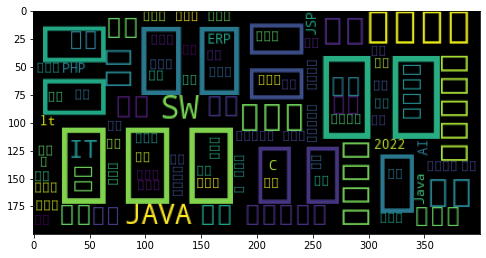

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np

wordcloud=WordCloud()

wc = wordcloud.generate_from_frequencies(temp_dic)
plt.figure(figsize=(8,15))
plt.imshow(wc) 
plt.show()

In [ ]:
df_all_tok

['[',
 '쇼핑몰',
 '기획자',
 ',',
 '웹',
 '디자이너',
 ']',
 '즐겁',
 '게',
 '오래',
 '근무',
 '...',
 '[',
 '더',
 '낫',
 '은',
 '인재',
 '교육',
 '컨설팅',
 ']',
 '에',
 '듀',
 '테크',
 '인공지능',
 '(',
 'AI',
 ')',
 '...',
 '쇼핑몰',
 'MD',
 '정규직',
 '직원',
 '채용',
 '(',
 '주',
 ')',
 '웨',
 'ㄹ',
 '오프',
 '스토리',
 '지시',
 '스템',
 '기술',
 '엔지니어',
 '모집',
 '공고',
 'Cisco',
 '네트워크',
 '및',
 'IPT',
 '엔지니어',
 '모집',
 '(',
 '신입',
 '...',
 'IT',
 '기획',
 '팀',
 '웹',
 '기획자',
 '신입',
 '&',
 '경력사',
 '원',
 '모집',
 '하',
 'ㅂ니다',
 '솔루션',
 'UI',
 '/',
 'UX',
 '개발자',
 '(',
 '연구소',
 '업무',
 ')',
 '펌웨어',
 '개발',
 '(',
 'pic',
 '18',
 'F',
 '계열',
 ',',
 'STM',
 '32',
 '계열',
 ')',
 '장비',
 '제어',
 '응용',
 '소프트웨어',
 '프로그래머',
 '모집',
 '[',
 '오',
 '엠',
 '인터',
 '랙',
 '티브',
 ']',
 '웹',
 '프로그램',
 '경력자',
 '(',
 '7',
 '년',
 '차',
 '이상',
 '...',
 'JAVA',
 '개발자',
 '모집',
 ',',
 '(',
 '주',
 ')',
 'S',
 '&',
 'J',
 '홀딩',
 '슬',
 '웹',
 '푸',
 '어',
 '블',
 'ㄹ',
 '리',
 '시',
 '어',
 '신규',
 '직원',
 '채용',
 '의',
 '건',
 'SW',
 '초급',
 '개발자',
 '모집',
 '(',
 'RPA',
 '교육',
 '무료',
 '제공',
 ')',
 

In [ ]:
df_all_title

,체용제목,토큰화
0,"[쇼핑몰 기획자, 웹 디자이너] 즐겁게 오래 근무...","[[, 쇼핑몰, 기획자, ,, 웹, 디자이너, ], 즐겁, 게, 오래, 근무, ...]"
1,[더나은인재교육컨설팅] 에듀테크 인공지능(AI) ...,"[[, 더, 낫, 은, 인재, 교육, 컨설팅, ], 에, 듀, 테크, 인공지능, (..."
2,쇼핑몰MD 정규직직원 채용,"[쇼핑몰, MD, 정규직, 직원, 채용]"
3,(주)웰오프 스토리지시스템 기술엔지니어 모집공고,"[(, 주, ), 웨, ㄹ, 오프, 스토리, 지시, 스템, 기술, 엔지니어, 모집,..."
4,Cisco 네트워크 및 IPT 엔지니어 모집(신입...,"[Cisco, 네트워크, 및, IPT, 엔지니어, 모집, (, 신입, ...]"
...,...,...
515,[DL 네트웍스] 생활용품 온라인 마켓 웹 상세페...,"[[, DL, 네트, 웍스, ], 생활, 용품, 온라인, 마켓, 웹, 상세, 페, ..."
516,쇼핑몰 디자인관련 전문인력 모십니다.,"[쇼핑몰, 디자인, 관련, 전문, 인력, 모시, ㅂ니다, .]"
517,소프트웨어 테스트 채용,"[소프트웨어, 테스트, 채용]"
518,[반도체/디스플레이/LCD]장비 설계 경력직원 채...,"[[, 반도체, /, 디스플레이, /, LCD, ], 장비, 설계, 경력, 직원, ..."


In [ ]:
df_all_title.to_csv("서울_성남_SW_채용정보_토큰화.csv",mode='w',encoding='utf-8')

In [ ]:
from collections import Counter
count=Counter(df_all_tok).most_common()
count

TypeError: ignored

In [ ]:
# Python program to remove all special characters from list

# take list
my_list = ['@know*', 'pr#ogra!m^', '(py_th@on_3}']

# initializing special characters
special_char = '@_!#$%^&*()<>?/\|}{~:;.[]'
 
# using filter() to remove special characters
out_list = [''.join(filter(lambda i: i not in special_char, string)) for string in my_list]
 
# print list without special characters
print('List after removal of special characters:', out_list)

List after removal of special characters: ['know', 'program', 'python3']


In [ ]:
import re 
my_list = ["한글@", "/.", "안녕하세요", "adf", "123"]

result = [re.sub('[^A-Za-z0-9가-힣]+', '', _) for _ in my_list]
result2 = [x for x in result if x]
result2

['한글', '안녕하세요', 'adf', '123']